In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
data_jan =pd.read_parquet("../yellow_tripdata_2022-01.parquet")

In [3]:
data_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [4]:
data_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**Question 1**

- Read the data for January. How many columns are there?

In [5]:
print("Number of columns :", len(data_jan.columns))

Number of columns : 19


**Question 2**

- What's the standard deviation of the trips duration in January?

In [6]:
data_jan["duration_delta"] = data_jan["tpep_dropoff_datetime"]- data_jan["tpep_pickup_datetime"]

In [7]:
data_jan['duration_delta'].head()

0   0 days 00:17:49
1   0 days 00:08:24
2   0 days 00:08:58
3   0 days 00:10:02
4   0 days 00:37:32
Name: duration_delta, dtype: timedelta64[ns]

In [8]:
data_jan["duration"]=data_jan["duration_delta"].dt.total_seconds()/60

In [9]:
print(" Standard deviation of the trips duration in January :",data_jan["duration"].std())

 Standard deviation of the trips duration in January : 46.44530513776802


**Question 3**

- What fraction of the records left after you dropped the outliers?

In [10]:
data_jan_new = data_jan[(data_jan["duration"]<60) & (data_jan["duration"]>1)]

In [11]:
fr = (len(data_jan)-len(data_jan_new))/len(data_jan)

In [12]:
print("fraction of the records left after you dropped the outliers :",100 - fr*100)

fraction of the records left after you dropped the outliers : 98.25883922885828


**Question 4**

- What's the dimensionality of this matrix (number of columns)?

In [13]:
data_jan_new.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration_delta',
       'duration'],
      dtype='object')

In [14]:
features = ["PULocationID","DOLocationID"]


In [15]:
data_jan_new[features] = data_jan[features].astype(str)

/tmp/ipykernel_114145/1064926157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jan_new[features] = data_jan[features].astype(str)


In [16]:
train_dict = data_jan_new[features].to_dict(orient="records")

In [17]:
dv = DictVectorizer()

In [18]:
X_train = dv.fit_transform(train_dict)

In [47]:
X_train

<2421030x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842060 stored elements in Compressed Sparse Row format>

- Dimensionality is 515

**Question 5**

**Training a linear regression model**

In [19]:
target = 'duration'

In [20]:
y_train = data_jan_new[target].values

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_train)

In [24]:
import matplotlib.pyplot as plt

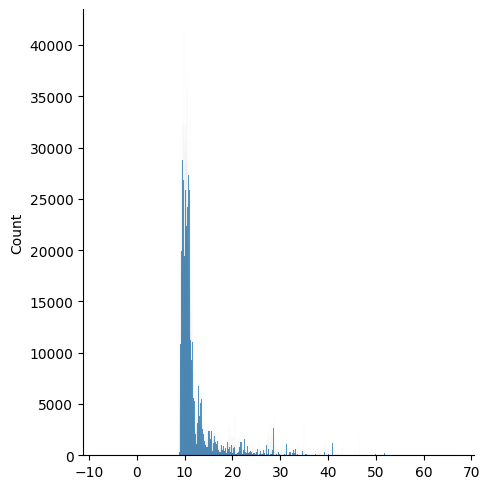

In [25]:
sns.displot(y_pred,label="prediction")


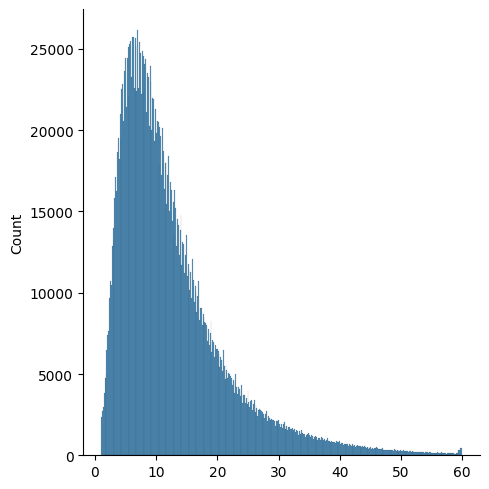

In [26]:

sns.displot(y_train,label="actual")



In [27]:
mean_squared_error(y_train,y_pred,squared=False)

6.983870711175259

- RMSE on train is 6.99

**Question 6**

**Evaluation of model**

In [28]:
data_feb = pd.read_parquet("../yellow_tripdata_2022-02.parquet")

In [29]:
data_feb["duration_delta"] = data_feb["tpep_dropoff_datetime"]- data_feb["tpep_pickup_datetime"]

In [30]:
data_feb["duration"]=data_feb["duration_delta"].dt.total_seconds()/60

In [40]:
data_feb = data_feb[(data_feb["duration"]<60) & (data_feb["duration"]>1)]

In [32]:
features = ["PULocationID","DOLocationID"]

In [41]:
data_feb[features] = data_feb[features].astype(str)

In [42]:
val_dict = data_feb[features].to_dict(orient="records")

In [43]:
X_test = dv.transform(val_dict)

In [44]:
y_test = data_feb["duration"].values

In [45]:
pred = lr.predict(X_test)

In [46]:
mean_squared_error(y_test,pred,squared=False)

7.7844280766161855

- RMSE ON Validation is 7.79